In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Загружаем таблицу csv с данными клиентов по оплате покупок
bank_clients_transactions = pd.read_csv('/content/drive/MyDrive/Курс/bank_clients_transactions.csv')

In [ ]:
# Проверяем загрузку таблицы
bank_clients_transactions

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
# Получаем информацию о данных таблицы (Количество строк, пропуски, дубликаты)
bank_clients_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


Всего в тблице 1048567 строк. 9 столбцов.

In [ ]:
# Присваиваем таблице для удобства новое название
df = pd.DataFrame(bank_clients_transactions)

In [ ]:
# Для дальнейшей работы переводим названия столбцов в формат snake_case
import re
# Функция для перевода в snake_case
def camel_to_snake(name):
    name = re.sub(r'[^\w\s]', '', name)  # удаляем спецсимволы
    name = re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower()  # добавляем _ перед заглавной буквой
    return name

# Применяем к столбцам
df.columns = [camel_to_snake(col) for col in df.columns]

In [ ]:
# Новое название столбцов таблицы в формате snake_case
df.columns

Index(['transaction_i_d', 'customer_i_d', 'customer_d_o_b', 'cust_gender',
       'cust_location', 'cust_account_balance', 'transaction_date',
       'transaction_time', 'transaction_amount _i_n_r'],
      dtype='object')

In [ ]:
# 1. Проверяем и удаляем полные дубликаты строк
print("Количество полных дубликатов до удаления:", df.duplicated().sum())
df = df.drop_duplicates()
print("✅ Дубликаты удалены\n")

# 2. Проверяем пропуски
print("Количество пропусков по столбцам:")
print(df.isnull().sum())

# 3. Удаляем строки с пропусками (если их немного)
df = df.dropna()

# 4. Проверяем результат
print("\n✅ Пропуски после обработки:")
print(df.isnull().sum().sum())  # должно быть 0
print("Финальное количество строк:", len(df))

Количество полных дубликатов до удаления: 0
✅ Дубликаты удалены

Количество пропусков по столбцам:
transaction_i_d                 0
customer_i_d                    0
customer_d_o_b               3397
cust_gender                  1100
cust_location                 151
cust_account_balance         2369
transaction_date                0
transaction_time                0
transaction_amount _i_n_r       0
dtype: int64

✅ Пропуски после обработки:
0
Финальное количество строк: 1041614


In [ ]:
# Определяем общее количество уникальных клиентов, основываясь на данных столбца 'customer_i_d'

# Определяем количество уникальных клиентов
unique_customers_count = df['customer_i_d'].nunique()

# Выводим результат
print(f"Количество уникальных клиентов: {unique_customers_count}")

Количество уникальных клиентов: 879358


In [ ]:
# Приводим дату в формат datetime

# Указываем точный формат даты: день/месяц/год (двузначный)
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d/%m/%y', errors='coerce')

# Диагностика
print("Тип данных после преобразования:", df['transaction_date'].dtype)
print("Количество NaT:", df['transaction_date'].isna().sum())

print("\nПримеры значений:")
print(df['transaction_date'].head())

Тип данных после преобразования: datetime64[ns]
Количество NaT: 0

Примеры значений:
0   2016-08-02
1   2016-08-02
2   2016-08-02
3   2016-08-02
4   2016-08-02
Name: transaction_date, dtype: datetime64[ns]


In [ ]:
# Считаем количество уникальных клиентов в определённом временном периоде : с 2016-08-02 по 2016-09-02

# Задаём диапазон дат
start_date = pd.to_datetime('2016-08-02')
end_date = pd.to_datetime('2016-09-02')

# Фильтруем данные по периоду
filtered_df = df[(df['transaction_date'] >= start_date) & (df['transaction_date'] <= end_date)]

# Считаем количество уникальных клиентов
unique_customers_in_period = filtered_df['customer_i_d'].nunique()

# Выводим результат
print(f"Количество уникальных клиентов с {start_date.date()} по {end_date.date()}: {unique_customers_in_period}")

Количество уникальных клиентов с 2016-08-02 по 2016-09-02: 602728


In [ ]:
# Подсчёт общего количества транзакций
total_transactions = len(df)

# Вывод результата
print(f"Общее количество транзакций: {total_transactions}")


Общее количество транзакций: 1041614


In [ ]:
# считаем среднее количество транзакций на клиента
transactions_per_customer = df.groupby('customer_i_d').size()
avg = transactions_per_customer.mean()

print(f"Среднее количество транзакций на клиента: {avg:.2f}")

Среднее количество транзакций на клиента: 1.18


In [ ]:
# Для удобства переименовываем столбцы
df = df.rename(columns={
   'transaction_amount _i_n_r' : 'transaction_amount_inr',
   'transaction_i_d' : 'transaction_id',
   'customer_i_d' : 'customer_id',
   'customer_d_o_b' : 'customer_dob',
   })

print(df.columns)

Index(['transaction_id', 'customer_id', 'customer_dob', 'cust_gender',
       'cust_location', 'cust_account_balance', 'transaction_date',
       'transaction_time', 'transaction_amount_inr'],
      dtype='object')


In [ ]:
# изучаем распределение и размах величин, таких как баланс клиента и сумма транзакций
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Убедимся, что данные числовые и нет пропусков
df['cust_account_balance'] = pd.to_numeric(df['cust_account_balance'], errors='coerce')
df['transaction_amount_inr'] = pd.to_numeric(df['transaction_amount_inr'], errors='coerce')


In [ ]:
# Сравним графики до и после логарифмирования
# Логарифмическое преобразование делает распределение более нормальным — удобнее для статистического анализа.
# Производим логарифмическое преобразование величины баланса клиента
import numpy as np
import pandas as pd

# Логарифмическое преобразование (натуральный логарифм)
df['log_balance'] = np.log(df['cust_account_balance'] + 1)  # +1 чтобы избежать log(0)


# Проверка результата
print(df[['cust_account_balance', 'log_balance']].head())

   cust_account_balance  log_balance
0              17819.05     9.788080
1               2270.69     7.728279
2              17874.44     9.791183
3             866503.21    13.672222
4               6714.43     8.812163


In [ ]:
#Делаем логарифмическое преобразование величины сумм транзакций
import numpy as np
import pandas as pd

# Логарифмическое преобразование (натуральный логарифм)
df['log_transactions'] = np.log(df['transaction_amount_inr'] + 1)  # +1 чтобы избежать log(0)


# Проверка результата
print(df[['transaction_amount_inr', 'log_transactions']].head())

   transaction_amount_inr  log_transactions
0                    25.0          3.258097
1                 27999.0         10.239960
2                   459.0          6.131226
3                  2060.0          7.630947
4                  1762.5          7.475056


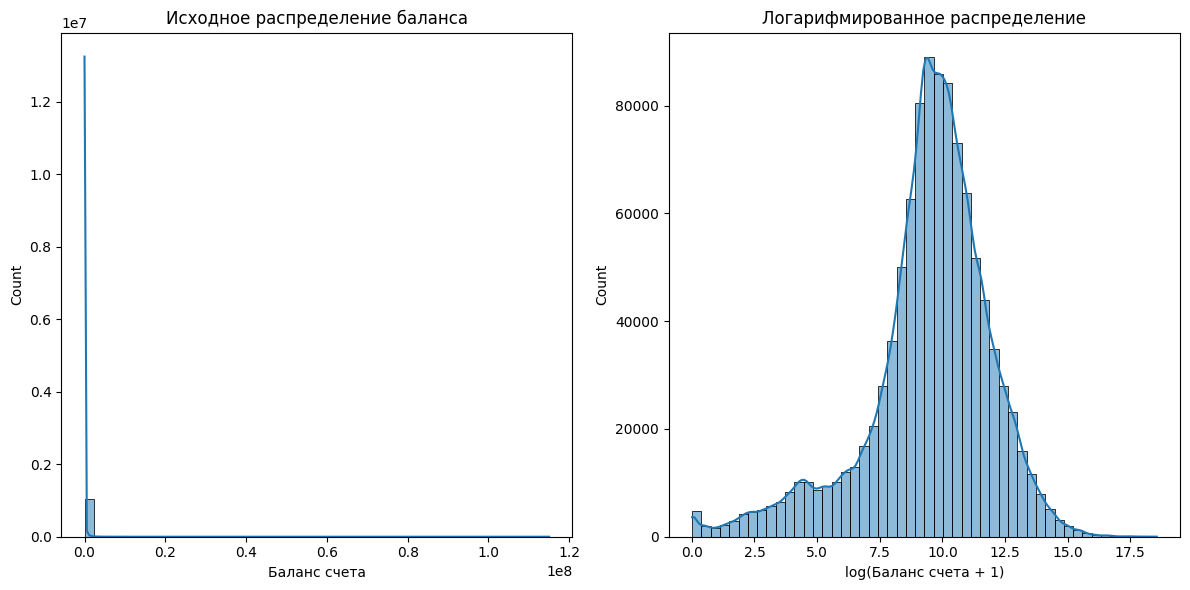

In [ ]:
# Сравним обычную гистограмму cust_account_balance и гистограмму в логарифмическом масштабе
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# До преобразования
plt.subplot(1, 2, 1)
sns.histplot(df['cust_account_balance'], bins=50, kde=True)
plt.title('Исходное распределение баланса')
plt.xlabel('Баланс счета')

# После преобразования
plt.subplot(1, 2, 2)
sns.histplot(df['log_balance'], bins=50, kde=True)
plt.title('Логарифмированное распределение')
plt.xlabel('log(Баланс счета + 1)')

plt.tight_layout()
plt.show()

Основная масса клиентов сосредоточена в среднем диапазоне балансов.
Пик распределения находится около логарифмической отметки ~10.
Это говорит о том, что большинство клиентов имеют средние балансы

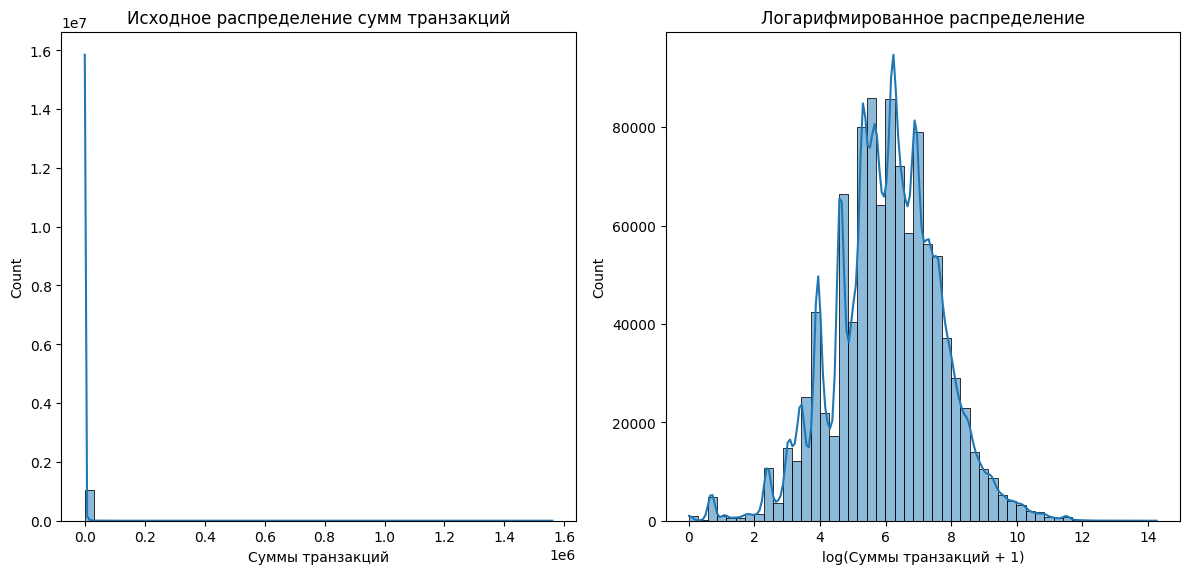

In [ ]:
# Сравним обычную гистограмму transaction_amount_inr и гистограмму в логарифмическом масштабе
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# До преобразования
plt.subplot(1, 2, 1)
sns.histplot(df['transaction_amount_inr'], bins=50, kde=True)
plt.title('Исходное распределение сумм транзакций')
plt.xlabel('Суммы транзакций')

# После преобразования
plt.subplot(1, 2, 2)
sns.histplot(df['log_transactions'], bins=50, kde=True)
plt.title('Логарифмированное распределение')
plt.xlabel('log(Суммы транзакций + 1)')

plt.tight_layout()
plt.show()

Основная масса транзакций сосредоточена в среднем диапазоне сумм:
Пик распределения находится около логарифмической отметки ~6.
Это говорит о том, что большинство транзакций имеют средние суммы .


Для большей наглядности построим диаграмму "скрипичный ключ" для значений баланса клиента и суммы транзакций

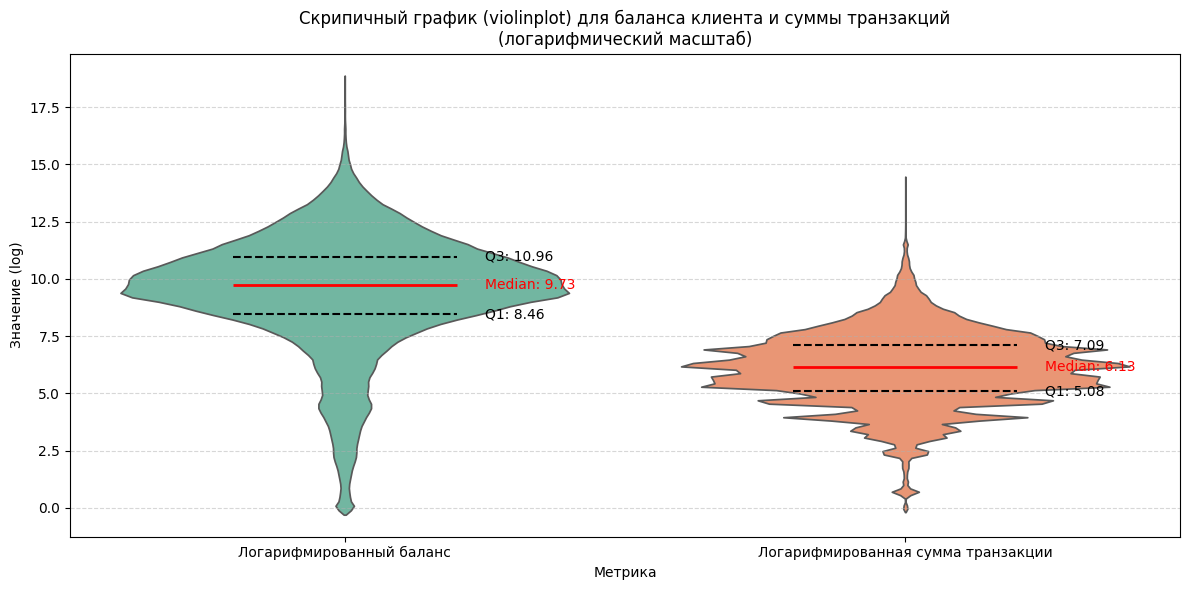

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Рассчитываем статистику для подписей
def get_stats(data):
    return {
        'q1': np.percentile(data, 25),
        'median': np.median(data),
        'q3': np.percentile(data, 75)
    }

balance_data = df['log_balance']
trans_data = df['log_transactions']

balance_stats = get_stats(balance_data)
trans_stats = get_stats(trans_data)

# Строим violinplot
plt.figure(figsize=(12, 6))

sns.violinplot(data=[balance_data, trans_data], inner=None, palette="Set2")

# Добавляем горизонтальные линии для Q1, медианы и Q3
positions = [0, 1]

for i, stats in enumerate([balance_stats, trans_stats]):
    plt.hlines(stats['q1'], xmin=i - 0.2, xmax=i + 0.2, color='black', linestyle='--')
    plt.hlines(stats['median'], xmin=i - 0.2, xmax=i + 0.2, color='red', linestyle='-', linewidth=2)
    plt.hlines(stats['q3'], xmin=i - 0.2, xmax=i + 0.2, color='black', linestyle='--')

    # Подписываем значения на графике
    plt.text(i + 0.25, stats['q1'], f'Q1: {stats["q1"]:.2f}', va='center', fontsize=10)
    plt.text(i + 0.25, stats['median'], f'Median: {stats["median"]:.2f}', va='center', fontsize=10, color='red')
    plt.text(i + 0.25, stats['q3'], f'Q3: {stats["q3"]:.2f}', va='center', fontsize=10)

# Оформление графика
plt.title('Скрипичный график (violinplot) для баланса клиента и суммы транзакций\n(логарифмический масштаб)')
plt.ylabel('Значение (log)')
plt.xlabel('Метрика')
plt.xticks(positions, ['Логарифмированный баланс', 'Логарифмированная сумма транзакции'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Показываем график
plt.tight_layout()
plt.show()

Распределение балансов клиентов:
Медиана баланса: ~9.73 (в логарифмическом масштабе).
Интерквартильный размах:
Q1 = 8.46
Q3 = 10.96
Распределение имеет вытянутый правый хвост , что указывает на наличие высоких балансов у части клиентов.

Распределение сумм транзакций:
Медиана суммы транзакций: ~6.13 (в логарифмическом масштабе).
Интерквартильный размах:
Q1 = 5.08
Q3 = 7.09
Распределение также имеет вытянутый правый хвост , что говорит о наличии высоких сумм транзакций у части клиентов.



Рассчитаем возраст клиентов на момент транзакций и на текущую дату


In [ ]:
# Возраст на момент транзакций
# Для расчета возраста клиентов приводим дату в формат datetime
from datetime import datetime

#  Преобразование дат с явным указанием формата
df['customer_dob'] = pd.to_datetime(df['customer_dob'], format='%d/%m/%y', errors='coerce')
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d/%m/%y', errors='coerce')

#  Исправление двухзначных годов (если %y использовался)
df['customer_dob'] = df['customer_dob'].mask(
df['customer_dob'].dt.year >= 2000,
df['customer_dob'] - pd.DateOffset(years=100)
)

#  Векторизованный расчет возраста
df['age_at_transaction'] = (df['transaction_date'].dt.year - df['customer_dob'].dt.year) - (
(df['transaction_date'].dt.month < df['customer_dob'].dt.month) |
((df['transaction_date'].dt.month == df['customer_dob'].dt.month) &
(df['transaction_date'].dt.day < df['customer_dob'].dt.day))
).astype(int)

# Валидация возраста (теперь включая удаление age=0)
df = df[(df['age_at_transaction'] >= 0) & (df['age_at_transaction'] <= 100)] # Оставляем строки, где возраст от 0 до 100 включительно

# Проверка результатов
print("Минимальный возраст:", df['age_at_transaction'].min())
print("Максимальный возраст:", df['age_at_transaction'].max())
print("Количество записей с age=0:", (df['age_at_transaction'] == 0).sum()) # Должно быть 0

Минимальный возраст: 16
Максимальный возраст: 98
Количество записей с age=0: 0


Статистика по возрасту клиентов:
count    984431.000000
mean         30.707101
std           8.750578
min          16.000000
25%          25.000000
50%          28.000000
75%          34.000000
max          98.000000
Name: age_at_transaction, dtype: float64


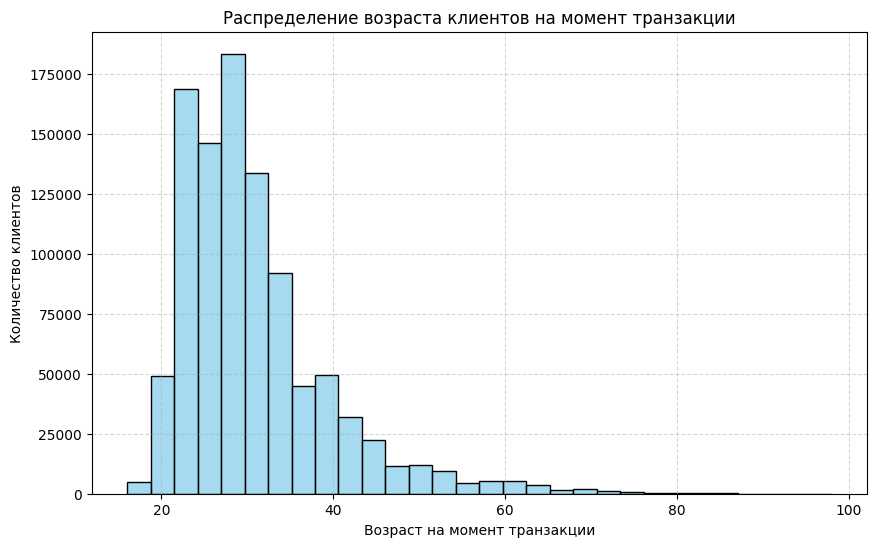

In [ ]:
# Общая статистика и гистограмма возраста
# Основная статистика
print("Статистика по возрасту клиентов:")
print(df['age_at_transaction'].describe())

# Гистограмма распределения
plt.figure(figsize=(10, 6))
sns.histplot(df['age_at_transaction'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Распределение возраста клиентов на момент транзакции')
plt.xlabel('Возраст на момент транзакции')
plt.ylabel('Количество клиентов')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Возраст 20–30 лет является самой активной группой по совершению транзакций.
Это может быть связано с тем, что молодые люди чаще используют цифровые платёжные системы или имеют больше потребностей в покупках. Активность снижается с возрастом: После 30–40 лет количество транзакций постепенно уменьшается . Целевая возрастная группа 20–30 лет

In [ ]:
# Возраст клиентов к сегодняшней дате (текущий возраст)
df = df.copy()
today = pd.Timestamp.today()
df['current_age'] = ((today - df['customer_dob']).dt.days / 365.25).astype(int)

# Выводим статистику по текущему возрасту
print("\nСтатистика по текущему возрасту клиентов:")
print(df['current_age'].describe())


Статистика по текущему возрасту клиентов:
count    984431.000000
mean         39.442365
std           8.750773
min          25.000000
25%          34.000000
50%          37.000000
75%          43.000000
max         107.000000
Name: current_age, dtype: float64


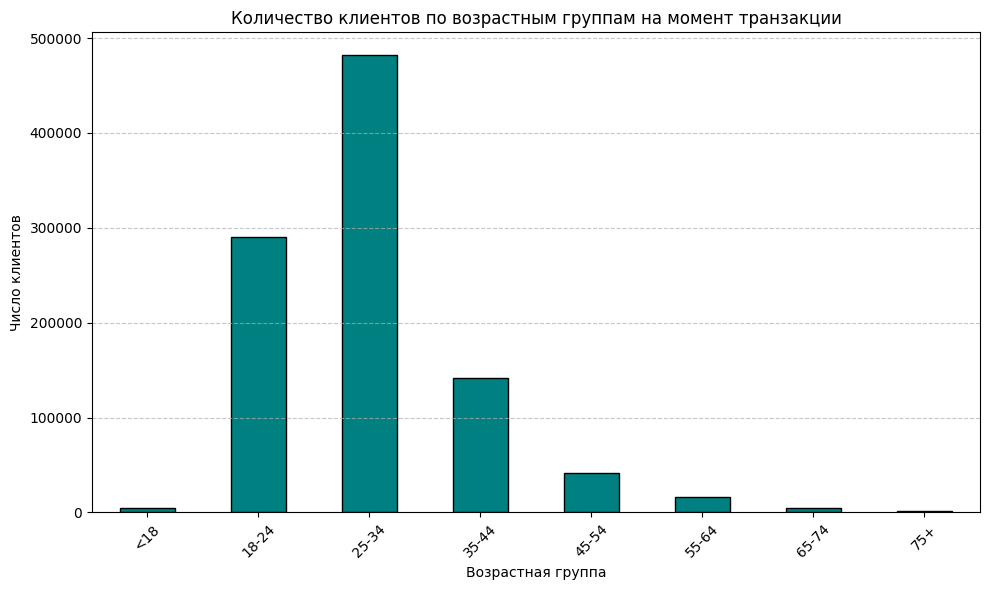

In [ ]:
# Сегментация по возрастным группам
# Создаем возрастные группы
bins = [0, 18, 25, 35, 45, 55, 65, 75, 90]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

df['age_group_at_transaction'] = pd.cut(df['age_at_transaction'], bins=bins, labels=labels, right=True)

# Расчет количества клиентов по возрастным группам
age_distribution = df['age_group_at_transaction'].value_counts().sort_index()

# Визуализация
age_distribution.plot(kind='bar', figsize=(10, 6), color='teal', edgecolor='black')
plt.title('Количество клиентов по возрастным группам на момент транзакции')
plt.xlabel('Возрастная группа')
plt.ylabel('Число клиентов')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Целевая аудитория:  клиенты 18–34 лет, так как они наиболее активны.
Программы лояльности для  групп от 35 и старше:  создание специальных программ для более старших клиентов, чтобы стимулировать их активность.
Нужно исследовать, почему активность падает после 35–44 лет, и какие изменения можно внедрить, чтобы увеличить лояльность старшей аудитории.

In [ ]:
# Изучаем количество клиентов по полу 'cust_gender'

# Приведём к единым значениям (пример)
gender_map = {
    'Male': 'Male',
    'male': 'Male',
    'M': 'Male',
    'Female': 'Female',
    'female': 'Female',
    'F': 'Female'
}

df['cust_gender'] = df['cust_gender'].map(gender_map).fillna('Unknown')

# Считаем количество и доли
gender_counts = df['cust_gender'].value_counts()
gender_percent = df['cust_gender'].value_counts(normalize=True).mul(100).round(2)

print("Количество клиентов по полу:")
print(gender_counts)

print("\nПроцентное распределение по полу:")
print(gender_percent.map("{}%".format))

Количество клиентов по полу:
cust_gender
Male      711829
Female    272602
Name: count, dtype: int64

Процентное распределение по полу:
cust_gender
Male      72.31%
Female    27.69%
Name: proportion, dtype: object


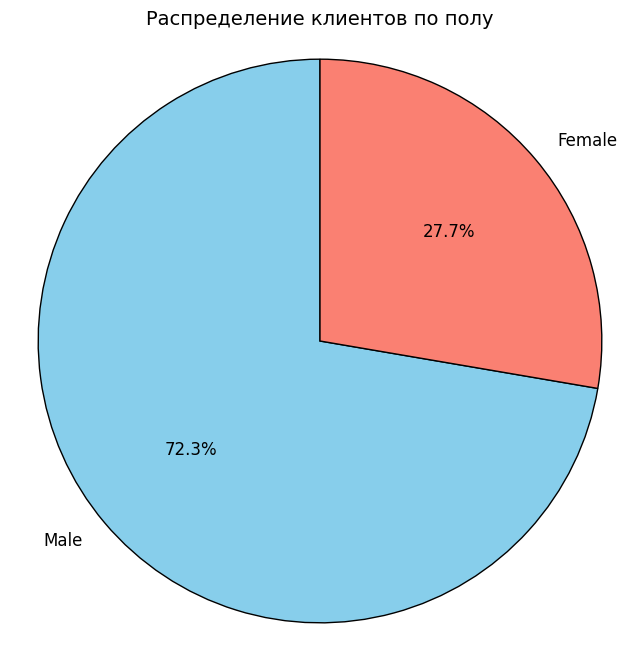

In [ ]:
# Строим круговую диаграмму для наглядности гендерного распределения
import matplotlib.pyplot as plt

# Подсчёт количества клиентов по полу
gender_counts = df['cust_gender'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',            # отображение процентов
    startangle=90,               # поворот диаграммы на 90 градусов
    colors=['skyblue', 'salmon', 'lightgrey'],  # цвета сегментов
    textprops={'fontsize': 12},  # размер шрифта подписей
    wedgeprops={'edgecolor': 'black'}  # границы сегментов
)

# Заголовок
plt.title('Распределение клиентов по полу', fontsize=14)

# Убираем квадратный вид и делаем круглым
plt.axis('equal')

# Отображаем график
plt.show()

In [ ]:
# Подсчитываем количество мест жительства клиентов
unique_cust_location = df['cust_location'].nunique()
unique_cust_location

8154

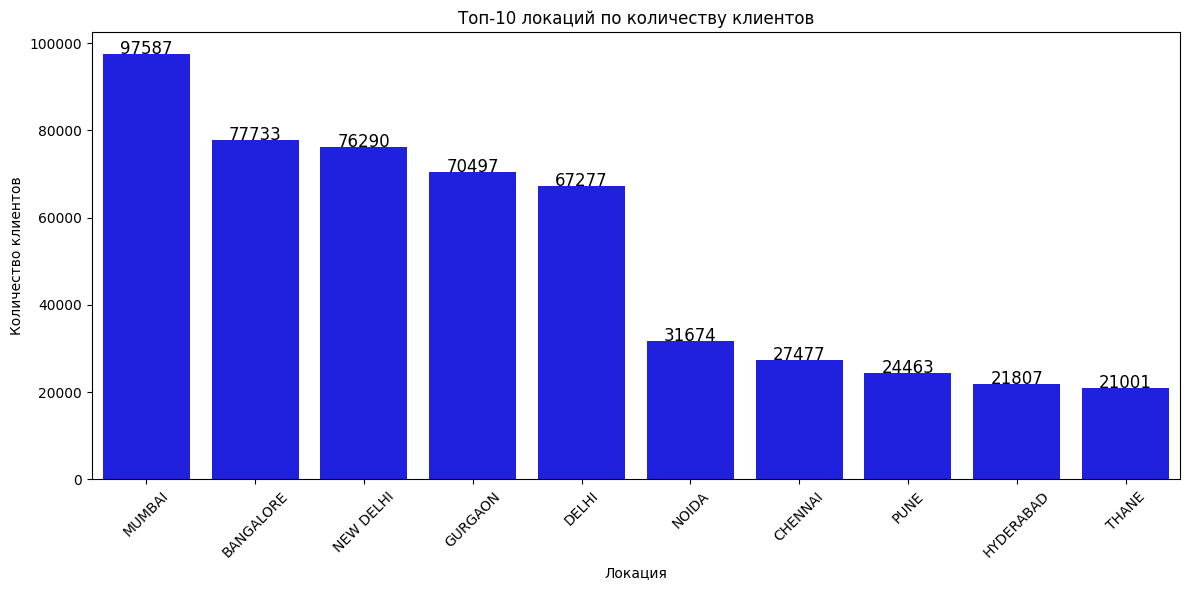

In [ ]:
#  Наибольшее количество уникальных клиентов по 10 локациям
import matplotlib.pyplot as plt
import seaborn as sns

# Подсчет количества клиентов по локациям (топ-10)
location_count = df['cust_location'].value_counts()[:10]

# Создаем график
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=location_count.index, y=location_count.values, color='blue')

# Добавляем значения на столбцах
for i, v in enumerate(location_count.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

# Оформление графика
plt.title('Топ-10 локаций по количеству клиентов')
plt.xticks(rotation=45)
plt.xlabel('Локация')
plt.ylabel('Количество клиентов')
plt.tight_layout()
plt.show()

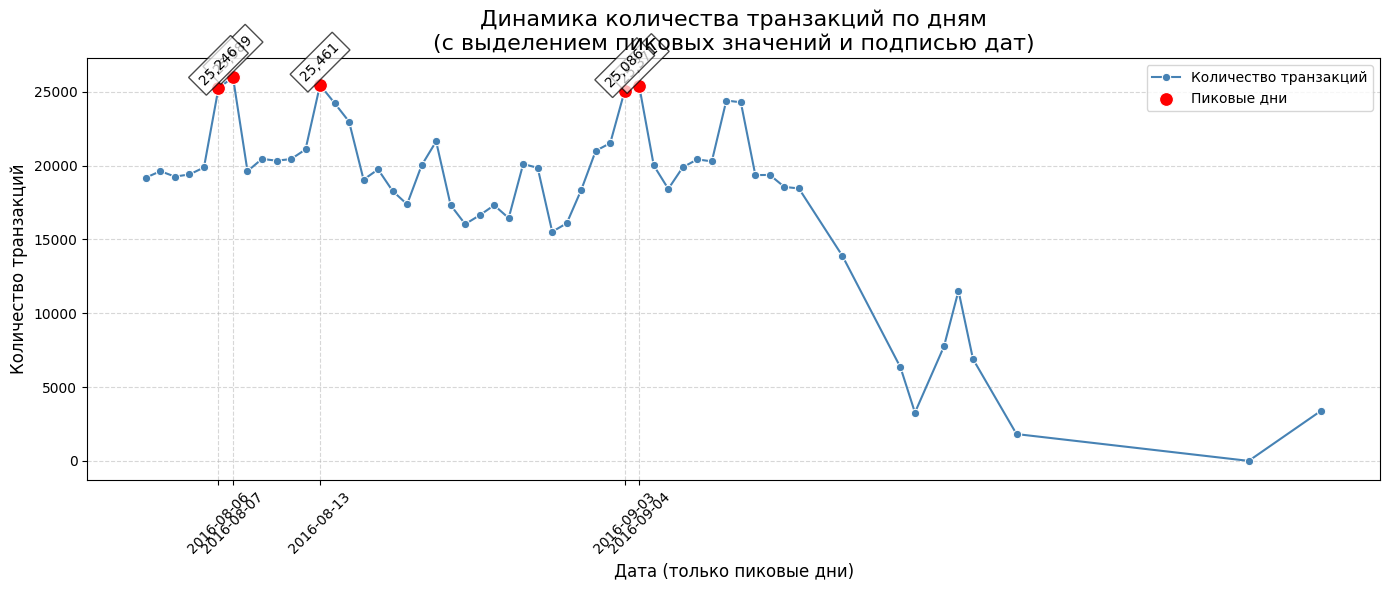

In [ ]:
# Анализируем транзакции по дням
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Убеждаемся что столбец 'transaction_date' в формате datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# Группируем транзакции по дням (сколько транзакций было в каждый день)
transactions_by_day = df.groupby(df['transaction_date'].dt.date).size()

# Построение графика
plt.figure(figsize=(14, 6))

sns.lineplot(x=transactions_by_day.index, y=transactions_by_day.values, color='steelblue', marker='o', label='Количество транзакций')

# Определяем пиковые значения (например, топ 10%)
top_n = int(len(transactions_by_day) * 0.1)
top_days = transactions_by_day.sort_values(ascending=False).head(top_n)

# Выделяем пиковые дни
sns.scatterplot(
    x=top_days.index,
    y=top_days.values,
    color='red',
    s=100,
    label='Пиковые дни',
    zorder=2
)

# Подписываем пиковые точки
for date, value in top_days.items():
    plt.text(
        date,
        value + 0.01 * transactions_by_day.max(),  # немного выше точки
        f'{value:,.0f}',
        ha='center',
        fontsize=10,
        rotation=45,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
    )
# Устанавливаем только пиковые даты как метки на оси X (опционально)
plt.xticks(ticks=top_days.index, labels=[d.strftime('%Y-%m-%d') for d in top_days.index], rotation=45)

# Оформление графика
plt.title('Динамика количества транзакций по дням\n(с выделением пиковых значений и подписью дат)', fontsize=16)
plt.xlabel('Дата (только пиковые дни)', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




График показывает колебания суммы транзакций по дням.
Есть несколько выдающихся пиков , которые значительно выше остальных значений.
После пиков наблюдается спад активности , что может быть связано с сезонностью или специфическими событиями. На графике видны четкие пики , соответствующие дням с высокой суммой транзакций. Эти дни являются лучшими в плане доходов. Возможно, это были праздники, распродажи или маркетинговые акции.

In [ ]:
# Находим группу с наибольшей суммой транзакций
import pandas as pd

# Предполагается, что df['age_group'] уже создан через pd.cut()

# Шаг 1: Группируем и суммируем транзакции, указываем observed=True
grouped = (
    df.groupby('age_group_at_transaction', observed=True)['transaction_amount_inr']
    .sum()
    .reset_index()
)

# Шаг 2: Находим группу с максимальной суммой
max_group = grouped.loc[grouped['transaction_amount_inr'].idxmax()]

# Шаг 3: Выводим результаты
print("💰 Общая сумма транзакций по возрастным группам:")
print(grouped.sort_values(by='transaction_amount_inr', ascending=False))

print("\n🏆 Самая платежеспособная группа (по общей сумме транзакций):")
print(f"Группа: {max_group['age_group_at_transaction']}")
print(f"Сумма транзакций: {max_group['transaction_amount_inr']:,.2f} INR")

💰 Общая сумма транзакций по возрастным группам:
  age_group_at_transaction  transaction_amount_inr
2                    25-34            6.578119e+08
3                    35-44            3.116442e+08
1                    18-24            2.514326e+08
4                    45-54            1.239872e+08
5                    55-64            5.525210e+07
6                    65-74            1.910437e+07
0                      <18            5.223212e+06
7                      75+            4.928693e+06

🏆 Самая платежеспособная группа (по общей сумме транзакций):
Группа: 25-34
Сумма транзакций: 657,811,885.33 INR


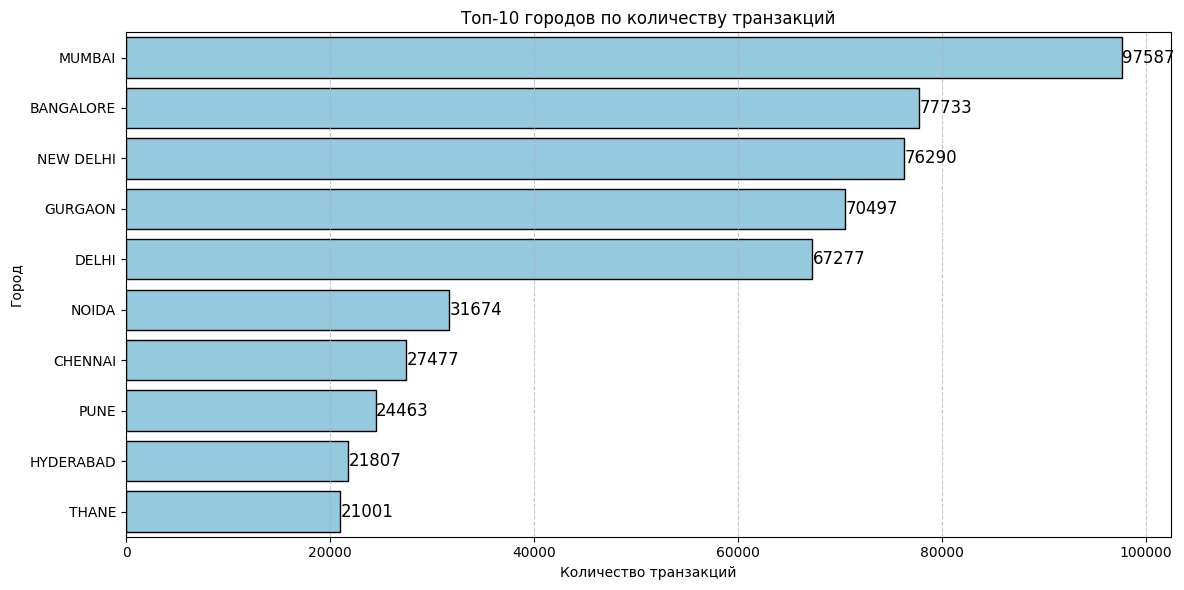

In [ ]:
# Изучаем распределение транзакций по локациям
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Считаем количество транзакций по каждому городу
transactions_by_location = (
    df['cust_location']
    .value_counts()
    .reset_index()
)

# Переименовываем колонки явно
transactions_by_location.columns = ['city', 'transaction_count']

# Шаг 2: Сортируем по убыванию
transactions_by_location = transactions_by_location.sort_values(by='transaction_count', ascending=False)

# Шаг 3: Выбираем топ-10 городов
top_cities = transactions_by_location.head(10).copy()

# Шаг 4: Строим график
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=top_cities,
    x='transaction_count',
    y='city',
    color='skyblue',
    edgecolor='black'
)

# Подписываем значения на столбцах
for index, value in enumerate(top_cities['transaction_count']):
    barplot.text(value + 50, index, str(value), va='center', fontsize=12)

# Оформление графика
plt.title('Топ-10 городов по количеству транзакций')
plt.xlabel('Количество транзакций')
plt.ylabel('Город')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Наибольшее количество транзакций было проведено городе Мумбай - 97587.

Среднее время транзакции: 2.62 мин
Медиана времени транзакции: 2.74 мин


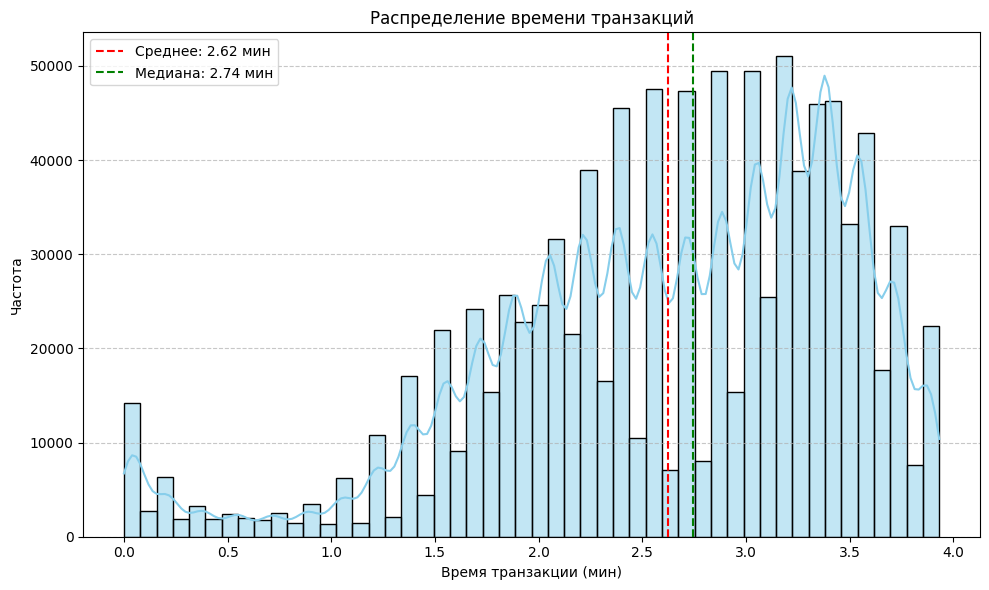

In [ ]:
# Изучим распределение времени транзакций

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что df['transaction_time'] содержит время в миллисекундах

# Шаг 1: Переводим миллисекунды в минуты
df['transaction_minutes'] = df['transaction_time'] / (1000 * 60)  # 1 минута = 60 сек × 1000 мс

# Шаг 2: Выводим основные статистики
mean_time = df['transaction_minutes'].mean()
median_time = df['transaction_minutes'].median()

print(f"Среднее время транзакции: {mean_time:.2f} мин")
print(f"Медиана времени транзакции: {median_time:.2f} мин")

# Шаг 3: Гистограмма распределения времени транзакций
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_minutes'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Подписываем среднее и медиану на графике
plt.axvline(mean_time, color='red', linestyle='--', label=f'Среднее: {mean_time:.2f} мин')
plt.axvline(median_time, color='green', linestyle='--', label=f'Медиана: {median_time:.2f} мин')
plt.legend()

# Оформление графика
plt.title('Распределение времени транзакций')
plt.xlabel('Время транзакции (мин)')
plt.ylabel('Частота')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Разница между средним и медианой: Медиана выше среднего, что указывает на несимметричное распределение с правым хвостом .
Пиковая активность:
Большинство транзакций происходит в короткие промежутки времени (менее 3 минут).
Это может быть связано с тем, что большинство клиентов быстро завершают свои операции.
Наблюдается небольшая группа транзакций , которые занимают более 3–4 минуты.
Эти транзакции могут быть связаны с более сложными процессами или проблемами с системой.

Изучаем таблицу с 1041614 строками.
Количество уникальных клиентов 879358.
Общее количество транзакций за исследуемый период 1041614.
Среднее количество транзакций на клиента: 1.18.
Большинство счетов содержат небольшие суммы. Немногие счета содержат очень крупные суммы (выбросы). Больше всего клиентов с балансом до 100 000. Есть несколько больших выбросов (до 115 млн.)
Больше всего клиентов в возрасте от 23 - 30 лет.
Общее число клиентов мужчин 711829. Женщин  272602. Или в процентах: мужчин   72.31%. Женщин 27.69%.
Количество локаций клиентов - 8154. Количество городов слишком большое для столбчатой диаграммы, поэтому выбираем 10 городов с наибольшим количестовом клиентов для наглядности.
Динамика количества транзакций по дням. Наибольшее количество транзакций (пиковые значения) - 2016-08-07: ~25,246 транзакций
2016-08-13: ~25,461 транзакций
2016-08-20: ~25,086 транзакций.
Первое место по количеству транзакций занимает город Мумбай - 97587. Столица - Дели на 5 месте по количеству клиентов(67277).
Среднее время транзакций: ~2.62 минуты.
Медиана времени транзакций: ~2.74 минуты.
